In [ ]:
# 구글 드라이브 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from tensorflow import keras

# **1. 이미지 file 가져오기**

In [ ]:
# 이미지 처리에 필요한 모듈 준비하기
import os
import glob

In [ ]:
path = '/content/drive/MyDrive/AI 감정인식 프로젝트/datasets' # 상위 폴더 경로(datasets)

# 각 잠정에 해당하는 path 잡아주기
path_angry = path+ '/angry'
path_disgust = path + '/disgust'
path_fear = path+ '/fear'
path_happy = path+ '/happy'
path_neutral = path+ '/neutral'
path_sad = path+ '/sad'
path_surprise = path+ '/surprise'

In [ ]:
# 각각의 감정별로 폴더에 접근하여 모든 파일 가져오기 -> 각각의 감정에 해당하는 파일 경로들을 list에 저장
angry = glob.glob(path_angry+ '/*')
disgust = glob.glob(path_disgust+ '/*')
fear = glob.glob(path_fear+ '/*')
happy = glob.glob(path_happy+ '/*')
neutral = glob.glob(path_neutral+ '/*')
sad = glob.glob(path_sad+ '/*')
surprise = glob.glob(path_surprise+ '/*')

In [ ]:
# 각 감정에 해당하는 이미지의 개수 확인하기
# 나중에 데이터 처리할 때는 이 부분은 주석처리 해주기

print('angry 이미지 개수: {}'.format(len(angry)))
print('disgust 이미지 개수: {}'.format(len(disgust)))
print('fear 이미지 개수: {}'.format(len(fear)))
print('happy 이미지 개수: {}'.format(len(happy)))
print('neutral 이미지 개수: {}'.format(len(neutral)))
print('sad 이미지 개수: {}'.format(len(sad)))
print('surprise 이미지 개수: {}'.format(len(surprise)))

angry 이미지 개수: 2538
disgust 이미지 개수: 3080
fear 이미지 개수: 2079
happy 이미지 개수: 6197
neutral 이미지 개수: 4675
sad 이미지 개수: 3418
surprise 이미지 개수: 3041


In [ ]:
# 수연님 코드 활용

feeling_images = [] # array 형태로 변환 후, 감정이 labeling 된 data 전체가 담길 빈 리스트

def get_images(feeling,emotion): 
  # feeling: 각 감정 이미지 경로가 저장되어 있는 리스트
  # emotion: labeling 용도

  try:
    for i in range(len(feeling)):
      image = cv2.imread(str(feeling[i])) 
      
      try:
        image = np.mean(image,axis = 2)
        image = image.astype(np.float32) / 255
        image = np.reshape(image,(1,48,48))
        
        feeling_images.append([image,str(emotion)]) # 매개변수로 넘어오는 감정을 label로 같이 저장한다.

      except:
        pass

  except FileNotFoundError:
    pass

In [ ]:
# get_images(feeling,emotion)

get_images(angry,'angry')
get_images(disgust,'disgust')
get_images(fear,'fear')
get_images(happy,'happy')
get_images(neutral,'neutral')
get_images(sad,'sad')
get_images(surprise,'surprise')

# **2. Train data / Test data**
- array 형태를 유지하면서 데이터를 나누는 방법을 잘 모르겠어서, 일단 DataFrame 으로 바꾸는 방법을 택했습니다.
- x_train, y_train: 학습 데이터(입력값) 
  > 결과값이 필요없기에(지가 알아내야 하는 부분) emotion 컬럼을 날려준다.
- x_test, y_test: 결과 학습용 데이터
  > test에 emotion 정보(정답)를 넣어주겠다.
- pandas의 dataframe을 이용하여 data를 train과 test로 나누어 두고, 나중에 모델에 학습시키기 좋게 다시 numpy의 ndarray로 변환해주면 될 듯 하다.

* (이 부분은 조금 더 고민해봐야겠어요.... 이미지를 array 형태로 표현해두니 저게 도대체 뭐가 표현되어있는건지..ㅇㅅㅇ;;)

In [ ]:
colnames = ['image','emotion'] # 이렇게 하면 feeling_images을 처음부터 빈 리스트로 쓰고, colname은 따로 붙여줄 수 있을 것 같아요.

feelings_df= pd.DataFrame(feeling_images,columns = colnames)
feelings_df

,image,emotion
0,"[[[0.12941177, 0.20784314, 0.2509804, 0.227450...",angry
1,"[[[0.19607843, 0.16862746, 0.15686275, 0.14509...",angry
2,"[[[0.9254902, 0.9254902, 0.92941177, 0.9215686...",angry
3,"[[[0.654902, 0.6509804, 0.6627451, 0.68235296,...",angry
4,"[[[0.67058825, 0.5647059, 0.39215687, 0.207843...",angry
...,...,...
25023,"[[[0.3137255, 0.2, 0.20392157, 0.21176471, 0.1...",surprise
25024,"[[[0.26666668, 0.24313726, 0.22352941, 0.21568...",surprise
25025,"[[[0.99215686, 1.0, 1.0, 0.6784314, 0.36862746...",surprise
25026,"[[[1.0, 1.0, 1.0, 0.99215686, 1.0, 1.0, 0.8352...",surprise


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(         
    feelings_df.drop('emotion',1),feelings_df['emotion'])  

# x_test, y_test: 결과 학습용 데이터 -> test에 emotion 정보(정답)를 넣어주기
# 이렇게 pandas의 dataframe을 이용하여 data를 train과 test로 나누어두고, 나중에 모델에 학습시키기 좋게 다시 numpy의 ndarray로 변환해주면 될 듯 함.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
len(x_train) # 18771 / 25028 (약 75%)

18771

In [ ]:
len(x_test) # 6257/ 25028 (약 25%)

6257

# **3. 교차 검증**
- 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것
- 대부분의 ML 모델의 성능을 평가할 때는 교차 검증 결과를 기반으로 1차적 평가를 한 후, 최종적으로 테스트 데이터 세트에 적용해 평가를 하는 방식이다.

### **3-1. Stratified K Fold**
- 불균형한(imbalanced) 분포도를 가진 label 데이터 집합을 위한 KFold 방식
- 현재 우리가 가지고 있는 감정 dataset의 경우 'happy'가 다른 사진들에 비해 양이 거의 2배이다.
- Stratified K Fold는 원본 데이터의 레이블 분포를 먼저 고려한 뒤, 이 분포와 동일하게 train/test data set를 분배해준다.
> 학습 데이터와 검증 데이터 세트가 가지는 레이블의 분포도가 유사하도록 test data를 추출한다.

In [ ]:
# 교차검증을 위한 모듈
from sklearn.model_selection import StratifiedKFold 

In [ ]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42) 

feelings_df['fold'] = -1    # 초기값으로 fold에 아무런 영향이 없는 값 설정

for idx, (t,v) in enumerate(skf.split(feelings_df,feelings_df['emotion'])): 
  # skt.split(dataset,dataset['label'])
  print(t,v,len(v))
  feelings_df.loc[v,'fold'] = idx

[    0     3     4 ... 25021 25023 25025] [    1     2     8 ... 25024 25026 25027] 5006
[    0     1     2 ... 25025 25026 25027] [   13    16    18 ... 25013 25015 25019] 5006
[    0     1     2 ... 25025 25026 25027] [   20    23    30 ... 25012 25014 25021] 5006
[    1     2     3 ... 25024 25026 25027] [    0     4     5 ... 25002 25017 25025] 5005
[    0     1     2 ... 25025 25026 25027] [    3    14    22 ... 25011 25020 25023] 5005


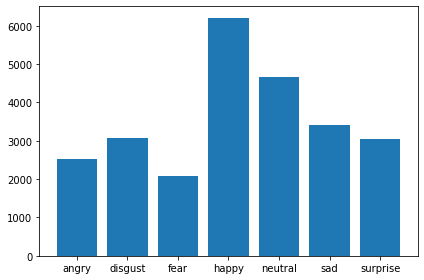

In [ ]:
# 시각화를 통해 train dataset과 test dataset이 분배된 양상 파악하기
value_counts = feelings_df[feelings_df['fold'] != 5]['emotion'].value_counts().sort_index()

plt.bar(range(len(value_counts)),value_counts.values,align = "center")
plt.xticks(range(len(value_counts)),value_counts.index.values)

plt.tight_layout()
plt.show()

In [ ]:
# 정리된 dataframe을 csv 파일로 내보내기
feelings_df.to_csv('/content/drive/MyDrive/AI 감정인식 프로젝트/datasets/feelings_skfold.csv',index = False)